#Installing Libraries:

In [ ]:
!pip install yfinance
!pip install streamlit
!pip install statsmodels
!pip install pmdarima

#Importing Libraries:

In [ ]:
import yfinance as yf
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#Fetching Dataset:

In [ ]:
#Fetching data till today:
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
gold_data = yf.download('GLD', start='2010-01-01', end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
gold_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-02,209.070007,211.029999,208.360001,210.889999,210.889999,13421100
2024-04-03,210.570007,212.830002,210.300003,212.740005,212.740005,11416200
2024-04-04,212.000000,213.449997,211.020004,211.520004,211.520004,12307300
2024-04-05,212.490005,215.740005,212.220001,215.139999,215.139999,13363400
2024-04-08,215.979996,216.809998,214.610001,216.479996,216.479996,10323400


In [ ]:
gold_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3.589000e+03
mean,142.277108,142.910268,141.601859,142.276720,142.276720,9.788970e+06
std,25.416706,25.548538,25.251526,25.421217,25.421217,6.261659e+06
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.436500e+06
25%,120.230003,120.739998,119.720001,120.220001,120.220001,5.914000e+06
50%,134.259995,135.059998,133.610001,134.369995,134.369995,8.207900e+06
75%,166.289993,166.960007,165.619995,166.339996,166.339996,1.172850e+07
max,215.979996,216.809998,214.610001,216.479996,216.479996,9.380420e+07


In [ ]:
gold_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
gold_data.shape

(3589, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3589 entries, 2010-01-04 to 2024-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3589 non-null   float64
 1   High       3589 non-null   float64
 2   Low        3589 non-null   float64
 3   Close      3589 non-null   float64
 4   Adj Close  3589 non-null   float64
 5   Volume     3589 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.3 KB


#Data Preporcessing:

In [ ]:
# Perform data preprocessing
def preprocess_data(data):
    data.dropna(inplace=True)
    data.index = pd.DatetimeIndex(data.index)
    data = data.asfreq('D')  # Set frequency to daily
    data.fillna(method='ffill', inplace=True)  # Forward fill missing values
    return data

#Exploratory Data Analysis:

In [ ]:
def eda(data):
    st.header('Exploratory Data Analysis (EDA)')

    # Display data
    st.subheader('Gold Price Data')
    st.write(data.head())

    # Plot time series data
    st.subheader('Time Series Plot')
    st.line_chart(data['Close'])

    # Plot ACF and PACF
    st.subheader('Autocorrelation and Partial Autocorrelation Plot')
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    plot_acf(data['Close'], ax=ax[0])
    plot_pacf(data['Close'], ax=ax[1])
    st.pyplot(fig)

    # Perform time series decomposition
    st.subheader('Time Series Decomposition')
    decomposition = seasonal_decompose(data['Close'], model='additive')
    fig, ax = plt.subplots(4, 1, figsize=(10, 8))
    ax[0].plot(decomposition.observed)
    ax[0].set_ylabel('Observed')
    ax[1].plot(decomposition.trend)
    ax[1].set_ylabel('Trend')
    ax[2].plot(decomposition.seasonal)
    ax[2].set_ylabel('Seasonal')
    ax[3].plot(decomposition.resid)
    ax[3].set_ylabel('Residual')
    plt.tight_layout()
    st.pyplot(fig)

    # Check stationarity
    st.subheader('Stationarity Check (ADF Test)')
    result = adfuller(data['Close'])
    st.write('ADF Statistic:', result[0])
    st.write('p-value:', result[1])
    st.write('Critical Values:')
    for key, value in result[4].items():
        st.write(f'   {key}: {value}')

#Train-Test Split:

In [ ]:
def split_data(data, forecast_period):
    train_size = len(data) - forecast_period
    train, test = data.iloc[:train_size], data.iloc[train_size:]
    return train, test

#Machine Learning Models:

##Linear Regression:

In [ ]:
def train_linear_regression(X_train, Y_train):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    return model

##Decision Tree:

In [ ]:
def train_decision_tree(X_train, Y_train):
    model = DecisionTreeRegressor()
    model.fit(X_train, Y_train)
    return model

##Random Forest:

In [ ]:
def train_random_forest(X_train, Y_train):
    model = RandomForestRegressor()
    model.fit(X_train, Y_train)
    return model

##ARIMA:

In [ ]:
def train_arima(data):
    model = ARIMA(data, order=(5, 1, 0))
    model_fit = model.fit()
    return model_fit

##SARIMA:

In [ ]:
def train_sarima(data):
    model = SARIMAX(data, order=auto_arima(data).order, seasonal_order=auto_arima(data).seasonal_order)
    model_fit = model.fit()
    return model_fit

#Forecasting:

In [ ]:
def forecast(model, data, steps):
    if hasattr(model, 'forecast'):
        return model.forecast(steps=steps)
    elif hasattr(model, 'predict'):
        return model.predict(data)
    else:
        raise AttributeError("Model does not have 'forecast' or 'predict' method")

#Streamlit App:

2024-04-09 07:02:50.210 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
<ipython-input-14-8c44f148816e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


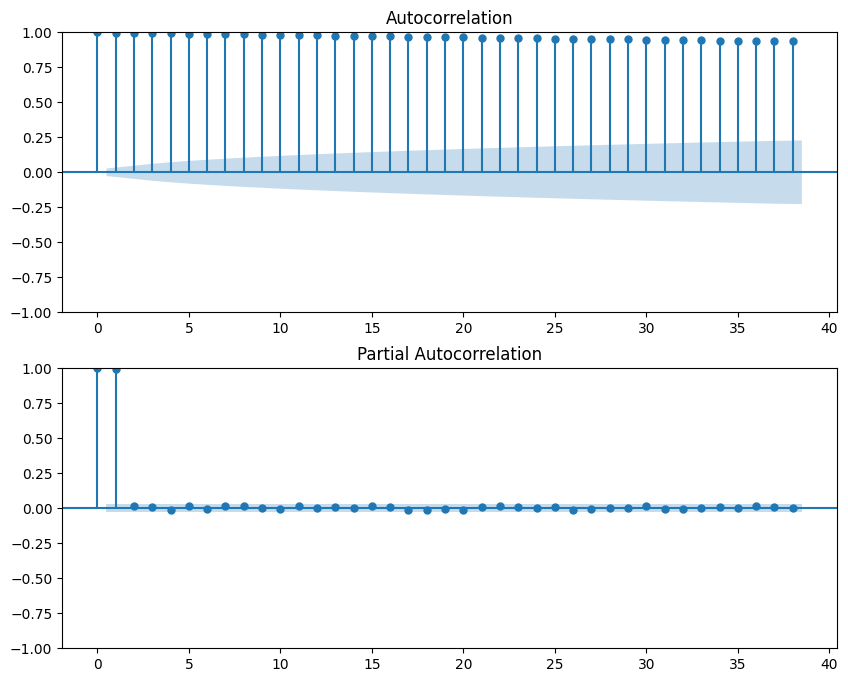

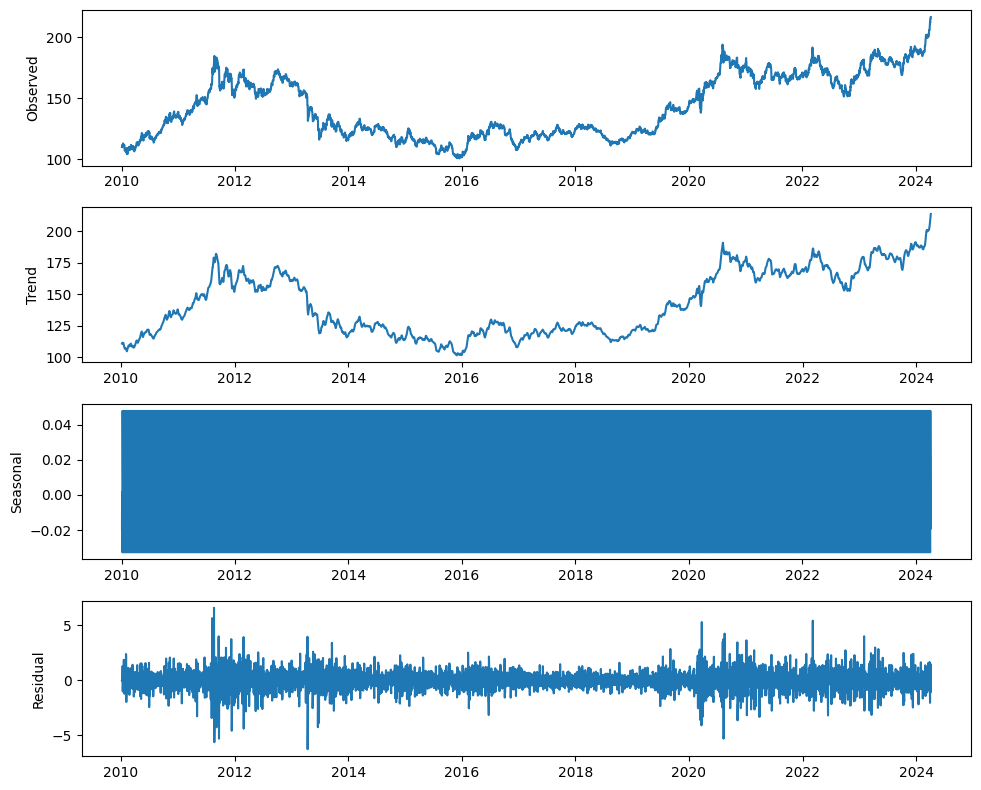

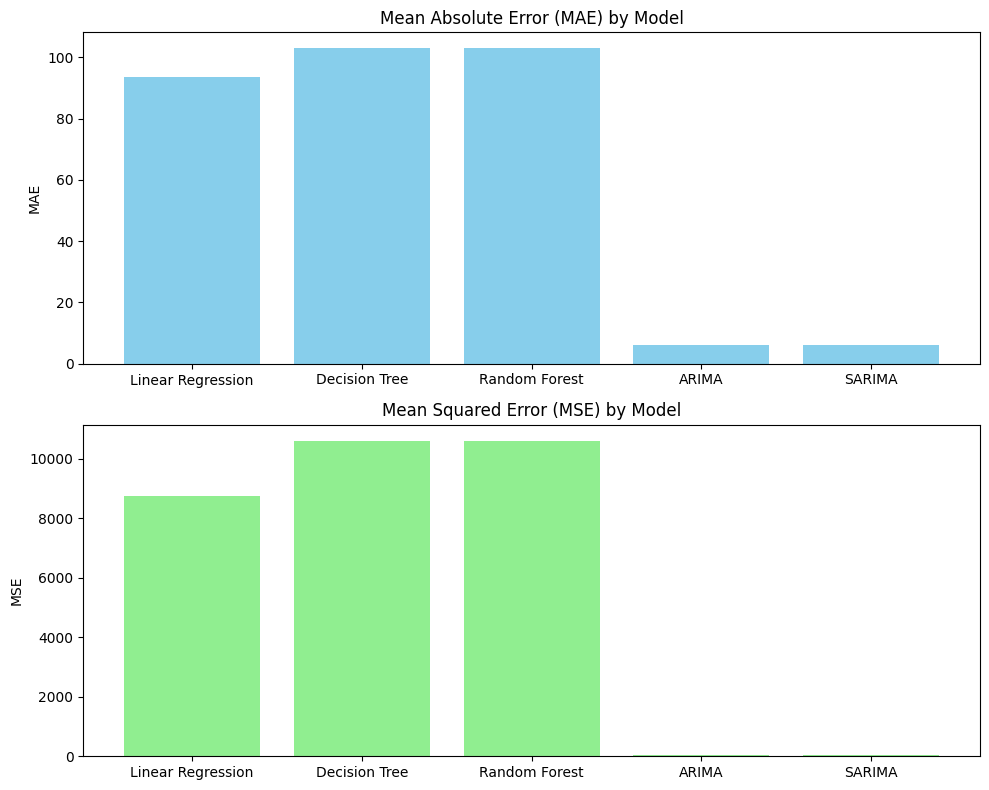

In [ ]:
def main():
    st.title('Gold Price Prediction')

    # Preprocess data
    gold_data_processed = preprocess_data(gold_data['Close'].to_frame())

    # Perform EDA
    eda(gold_data_processed)

    # Train-test split
    forecast_period = 7
    train_data, test_data = split_data(gold_data_processed, forecast_period)

    # Train models
    lr_model = train_linear_regression(np.arange(len(train_data)).reshape(-1, 1), train_data.values)
    dt_model = train_decision_tree(np.arange(len(train_data)).reshape(-1, 1), train_data.values)
    rf_model = train_random_forest(np.arange(len(train_data)).reshape(-1, 1), train_data.values)
    arima_model = train_arima(train_data)
    sarima_model = train_sarima(train_data)

    # Forecast trained models
    lr_forecast_result = forecast(lr_model, np.arange(len(test_data)).reshape(-1, 1), forecast_period)
    dt_forecast_result = forecast(dt_model, np.arange(len(test_data)).reshape(-1, 1), forecast_period)
    rf_forecast_result = forecast(rf_model, np.arange(len(test_data)).reshape(-1, 1), forecast_period)
    arima_forecast_result = arima_model.forecast(steps=forecast_period)
    sarima_forecast_result = sarima_model.forecast(steps=forecast_period)

    # Calculate metrics
    metrics = {}
    for name, forecast_result in zip(['Linear Regression', 'Decision Tree', 'Random Forest', 'ARIMA', 'SARIMA'],
                                     [lr_forecast_result, dt_forecast_result, rf_forecast_result,
                                      arima_forecast_result, sarima_forecast_result]):
        metrics[name] = {'MAE': mean_absolute_error(test_data, forecast_result),
                         'MSE': mean_squared_error(test_data, forecast_result)}

    # Display results
    st.subheader('Gold Price Forecast')
    st.write('Linear Regression Forecast:', lr_forecast_result)
    st.write('Decision Tree Forecast:', dt_forecast_result)
    st.write('Random Forest Forecast:', rf_forecast_result)
    st.write('ARIMA Forecast:', arima_forecast_result)
    st.write('SARIMA Forecast:', sarima_forecast_result)

    # Display metrics
    st.subheader('Evaluation Metrics')
    for model, metric_values in metrics.items():
        st.write(model)
        st.write('MAE:', metric_values['MAE'])
        st.write('MSE:', metric_values['MSE'])

    # Visualize metrics
    models = list(metrics.keys())
    mae_values = [metric_values['MAE'] for metric_values in metrics.values()]
    mse_values = [metric_values['MSE'] for metric_values in metrics.values()]

    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    axes[0].bar(models, mae_values, color='skyblue')
    axes[0].set_title('Mean Absolute Error (MAE) by Model')
    axes[0].set_ylabel('MAE')
    axes[1].bar(models, mse_values, color='lightgreen')
    axes[1].set_title('Mean Squared Error (MSE) by Model')
    axes[1].set_ylabel('MSE')
    plt.tight_layout()

    st.pyplot(fig)

if __name__ == '__main__':
    main()

In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.243.178.170:8501

  Stopping...
  Stopping...
^C


In [ ]:
!pip install yfinance
!pip install streamlit
!pip install statsmodels
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.7 MB/s eta 0:00:00


##Application Running:

In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.145.186.77


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.145.186.77:8501

npx: installed 22 in 4.334s
your url is: https://wet-parks-divide.loca.lt
[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3589 entries, 2010-01-04 to 2024-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3589 non-null   float64
 1   High       3589 non-null   float64
 2   Low        3589 non-null   float64
 3   Close      3589 non-null   float64
 4   Adj Close  3589 non-null   float64
 5   Volume     3589 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.3 KB
/content/app.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)
RUNNING THE L-